In [9]:
import pandas as pd

df = pd.read_csv('Ice Cream.csv')
print(df.isnull().sum())
print(df.columns)

Temperature    0
Revenue        0
dtype: int64
Index(['Temperature', 'Revenue'], dtype='object')


In [11]:
X = df['Temperature'].values
X = X.reshape(-1,1)
y = df['Revenue'].values

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

y_predict = model.predict(X_test)

from sklearn.metrics import r2_score

r2 = r2_score(y_predict,y_test)
print(f'R^2score : {r2}')


R^2score : 0.9758655688959013


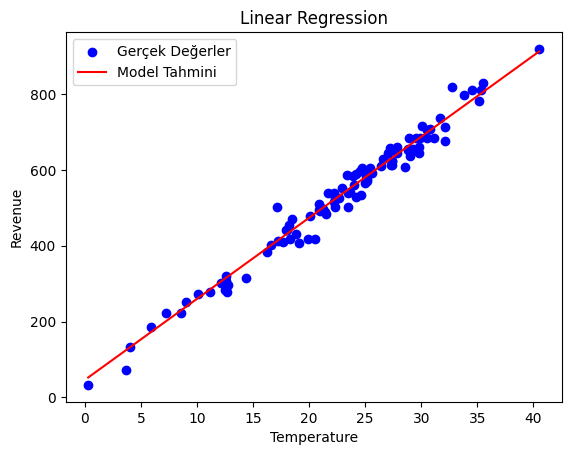

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Gerçek değerler (mavi noktalar)
plt.scatter(X_test, y_test, color='blue', label='Gerçek Değerler')

# Doğrusal regresyon çizgisi (model tahminleri)
# X_test verilerini sıralayarak düzgün bir çizgi elde ederiz
X_test_sorted = np.sort(X_test, axis=0)  # X_test sıralanır
y_predict_sorted = model.predict(X_test_sorted)  # Model tahminleri sıralanmış veriye göre alınır

plt.plot(X_test_sorted, y_predict_sorted, color='red', label='Model Tahmini')

# Grafik etiketleri ve başlığı
plt.xlabel('Temperature')  # X ekseni etiketi
plt.ylabel('Revenue')      # Y ekseni etiketi
plt.title('Linear Regression')
plt.legend()
plt.show()